# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane appear to be the most effective drug regimens in treating squamous cell carcinoma (SCC) out of the 10 drugs given, with Capomulin averaging 40.68 mm3 and Ramicane averaging 40.22 mm3 in tumor sizes.
- The drug regimens were just about evenly distributed amongst both genders, with Males having the slight majority at 51% over Females at 49%.
- There is a postive correlation of 0.84 between average weight and average tumor size. As we see the weight increase, the tumor size increases in size as well.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_study = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
mouse_data_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
mouse_count = mouse_metadata["Mouse ID"].count()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = mouse_data_study[mouse_data_study.duplicated(subset=["Mouse ID", "Timepoint"])]

duplicate_mouse["Mouse ID"].values[:]

array(['g989', 'g989', 'g989', 'g989', 'g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = mouse_data_study.loc[mouse_data_study["Mouse ID"] == "g989", :]

duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_study_cleaned = mouse_data_study[mouse_data_study["Mouse ID"] != "g989"]

mouse_data_study_cleaned

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_data_study_cleaned["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_volume = mouse_data_study_cleaned.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor_volume = mouse_data_study_cleaned.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance_tumor_volume = mouse_data_study_cleaned.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_tumor_volume = mouse_data_study_cleaned.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_tumor_volume = mouse_data_study_cleaned.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_statistics = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume, 
    "Tumor Volume Std. Dev.": std_tumor_volume,
    "Tumor Volume Std. Err.": sem_tumor_volume  
})

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_statistics_agg = mouse_data_study_cleaned.groupby(["Drug Regimen"]).agg(
    ["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]

summary_statistics_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
timepoint_number = mouse_data_study_cleaned.groupby(["Drug Regimen"]).count()["Timepoint"]
timepoint_number_df = pd.DataFrame({"Number of Timepoints": timepoint_number})
timepoint_number_df = timepoint_number_df.reset_index()
timepoint_number_df = timepoint_number_df.sort_values(by=["Number of Timepoints"], ascending=False)
drug = timepoint_number_df["Drug Regimen"]
timepoint = timepoint_number_df["Number of Timepoints"]

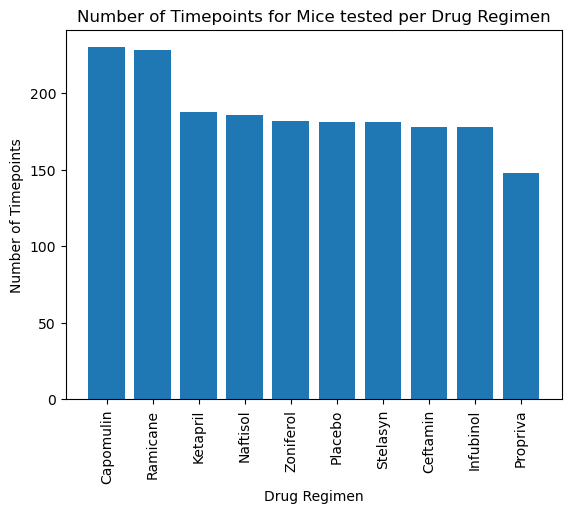

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
plt.title("Number of Timepoints for Mice tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xticks(rotation="vertical")

plt.bar(drug, timepoint, align="center")
plt.savefig("Images/01 - Number of Timepoints for Mice tested per Drug Regimen - Pandas.png")
plt.show()

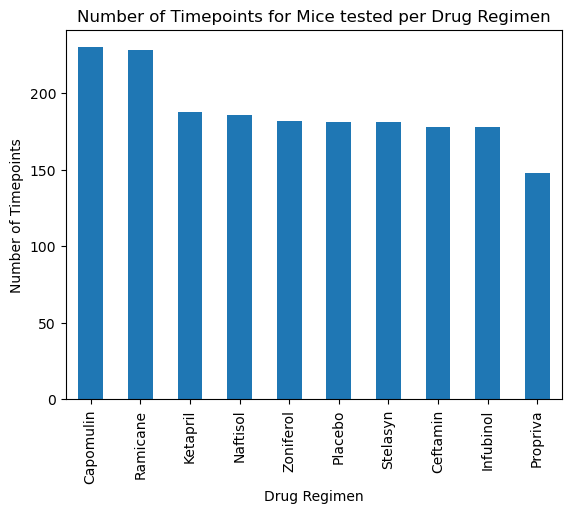

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint_number = timepoint_number.sort_values(ascending=False)
timepoint_drug = timepoint_number.plot(kind="bar", title="Number of Timepoints for Mice tested per Drug Regimen")
timepoint_drug.set_xlabel("Drug Regimen")
timepoint_drug.set_ylabel("Number of Timepoints")

plt.savefig("Images/02 - Number of Timepoints for Mice tested per Drug Regimen - PyPlot.png")

In [12]:
mouse_gender = mouse_data_study_cleaned.groupby(["Sex"]).count()["Mouse ID"]
mouse_gender_df = pd.DataFrame({"Count": mouse_gender})
mouse_gender_df = mouse_gender_df.reset_index()

gender = mouse_gender_df["Sex"]
gender_count = mouse_gender_df["Count"]

mouse_gender_df

,Sex,Count
0,Female,922
1,Male,958


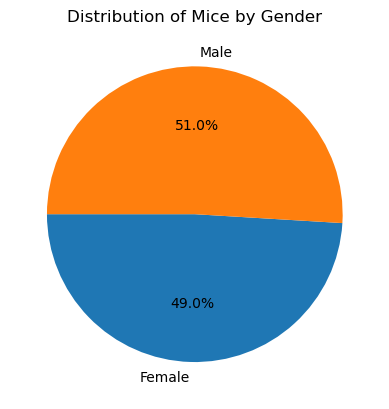

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plt.title("Distribution of Mice by Gender")
plt.pie(gender_count, labels=gender, autopct="%1.1f%%", startangle=180)
plt.savefig("Images/03 - Distribution of Mice by Gender - Pandas.png")
plt.show()

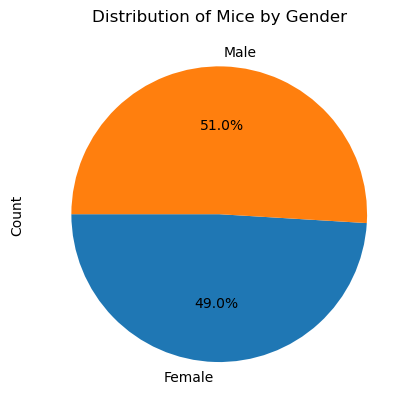

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_plot = gender_count.plot(kind="pie", labels=gender, title="Distribution of Mice by Gender", startangle=180, autopct="%1.1f%%")
plt.savefig("Images/04 - Distribution of Mice by Gender - PyPlot.png")

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_data_study_id = mouse_data_study.groupby("Mouse ID")
max_timepoint = mouse_data_study_id['Timepoint'].max()
max_timepoint = max_timepoint.reset_index()
max_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_volume = pd.merge(max_timepoint, mouse_data_study, on=["Mouse ID", "Timepoint"])

max_timepoint_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_by_drug = max_timepoint_volume.loc[max_timepoint_volume["Drug Regimen"] == drug, ["Tumor Volume (mm3)"]]
    tumor_volume.append(tumor_by_drug["Tumor Volume (mm3)"])

    # Determine outliers using upper and lower bounds
    quartiles = tumor_by_drug["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = tumor_by_drug.loc[(tumor_by_drug["Tumor Volume (mm3)"] <= lower_bound) | (tumor_by_drug["Tumor Volume (mm3)"] >= upper_bound)]

    print(f"{drug}'s potential outliers: {outliers.count()}")
    
    # Print out outliers if any are found
    if not (outliers.empty):
        print(outliers['Tumor Volume (mm3)'])
    
    print(f"\n")


Capomulin's potential outliers: Tumor Volume (mm3)    0
dtype: int64


Ramicane's potential outliers: Tumor Volume (mm3)    0
dtype: int64


Infubinol's potential outliers: Tumor Volume (mm3)    1
dtype: int64
31    36.321346
Name: Tumor Volume (mm3), dtype: float64


Ceftamin's potential outliers: Tumor Volume (mm3)    0
dtype: int64




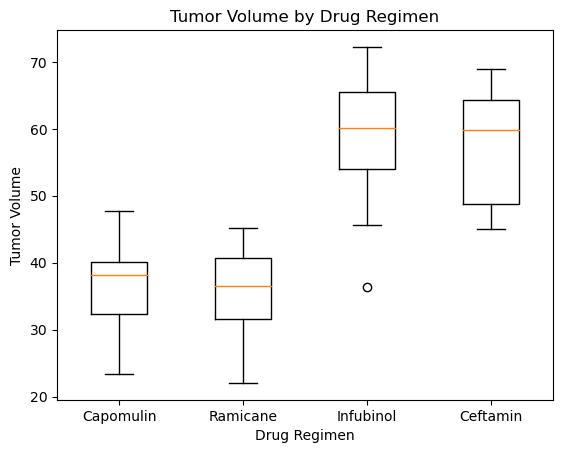

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ticks = [1,2,3,4]
ax1.set_title("Tumor Volume by Drug Regimen")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tumor Volume")
ax1.boxplot(tumor_volume)
plt.xticks(ticks, treatments)
plt.savefig("Images/05 - Tumor Volume by Drug Regimen - boxplot.png")

plt.show()

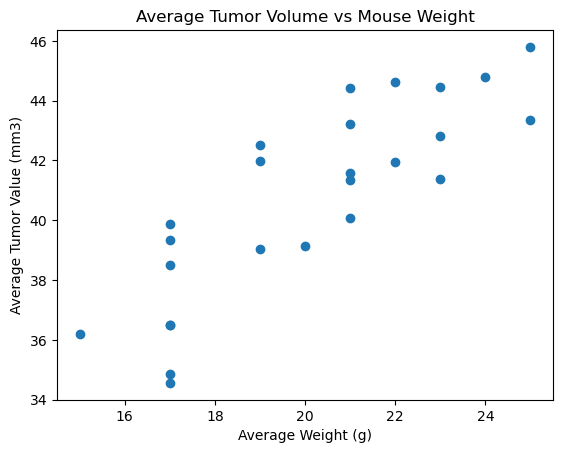

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_mouse_df = mouse_data_study.loc[mouse_data_study["Drug Regimen"] == "Capomulin"]
capomulin_avg = capomulin_mouse_df.groupby("Mouse ID").mean()
capomulin_avg 

plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Value (mm3)")

plt.savefig("Images/06 - Average Tumor Volume vs Mouse Weight - boxplot.png")

plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


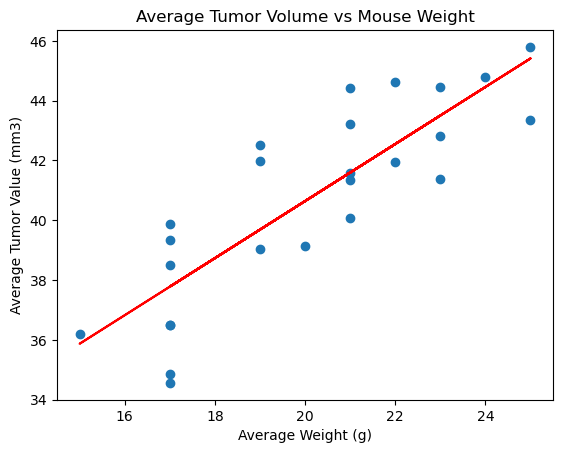

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

weight = capomulin_avg["Weight (g)"]
tumor = capomulin_avg["Tumor Volume (mm3)"]

correlation = st.pearsonr(weight,tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, tumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,tumor)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Value (mm3)")
plt.savefig("Images/07 - Average Tumor Volume vs Mouse Weight - correlation.png")

plt.show()
